# THEROETICAL ANSWERS

Question 1: What is Unsupervised Learning in the context of Machine Learning?
 - Answer:
Unsupervised learning is a type of machine learning where the model finds hidden patterns or structures in unlabeled data. It doesn’t rely on predefined outputs and is commonly used for clustering and dimensionality reduction.

Question 2: How does K-Means clustering algorithm work?
- Answer:
K-Means divides data into K clusters by assigning each point to the nearest cluster centroid and then updating centroids based on the mean of assigned points. This process repeats until cluster assignments stabilize.

Question 3: Explain the concept of a dendrogram in hierarchical clustering.
- Answer:
A dendrogram is a tree-like diagram that shows how clusters merge or split at different distances. It helps visualize the hierarchy and determine the optimal number of clusters by cutting the tree at a chosen level.

Question 4: What is the main difference between K-Means and Hierarchical Clustering?
- Answer:
K-Means requires the number of clusters beforehand and optimizes using centroids, while Hierarchical Clustering builds a tree of clusters without predefining K and can show relationships between clusters.

Question 5: What are the advantages of DBSCAN over K-Means?
- Answer:
DBSCAN can detect clusters of arbitrary shapes, doesn’t require specifying the number of clusters, and effectively handles noise, unlike K-Means which assumes spherical clusters and fixed K.

Question 6: When would you use Silhouette Score in clustering?
- Answer:
Silhouette Score is used to measure how well each data point fits within its cluster compared to others. It helps determine the quality of clustering and the optimal number of clusters.

Question 7: What are the limitations of Hierarchical Clustering?
- Answer:
It is computationally expensive for large datasets, sensitive to noise, and once clusters are merged or split, they cannot be undone, making it less flexible than iterative methods like K-Means.

Question 8: Why is feature scaling important in clustering algorithms like K-Means?
- Answer:
Feature scaling ensures all variables contribute equally to the distance calculations. Without scaling, features with larger numeric ranges can dominate clustering results.

Question 9: How does DBSCAN identify noise points?
- Answer:
DBSCAN labels points as noise if they have fewer than the required minimum number of neighbors (MinPts) within the specified radius (eps). Such points do not belong to any cluster.

Question 10: Define inertia in the context of K-Means.
- Answer:
Inertia measures the sum of squared distances between each point and its assigned cluster centroid. Lower inertia indicates tighter, more compact clusters.

Question 11: What is the elbow method in K-Means clustering?
- Answer:
The elbow method plots inertia versus the number of clusters (K). The “elbow” point, where the rate of decrease sharply slows, suggests the optimal number of clusters.

Question 12: Describe the concept of "density" in DBSCAN.
- Answer:
In DBSCAN, density refers to the number of data points within a specified radius (eps). High-density regions form clusters, while sparse regions are considered noise.

Question 13: Can hierarchical clustering be used on categorical data?
- Answer:
Yes, but it requires a suitable distance measure like Hamming or Gower distance since standard Euclidean distance is not appropriate for categorical features.

Question 14: What does a negative Silhouette Score indicate?
- Answer:
A negative Silhouette Score means that data points may be assigned to the wrong cluster, as they are closer to points in another cluster than their own.

Question 15: Explain the term "linkage criteria" in hierarchical clustering.
- Answer:
Linkage criteria determine how distances between clusters are calculated, such as single (minimum), complete (maximum), or average linkage, affecting cluster formation.

Question 16: Why might K-Means clustering perform poorly on data with varying cluster sizes or densities?
- Answer:
K-Means assumes equal-sized, spherical clusters. It struggles when clusters differ in size or density, leading to incorrect assignments and biased centroids.

Question 17: What are the core parameters in DBSCAN, and how do they influence clustering?
- Answer:
DBSCAN’s main parameters are eps (radius) and MinPts (minimum points). eps controls neighborhood size, while MinPts defines the density threshold for forming clusters.

Question 18: How does K-Means++ improve upon standard K-Means initialization?
- Answer:
K-Means++ chooses initial centroids more strategically by spreading them apart, reducing chances of poor clustering and speeding up convergence.

Question 19: What is Agglomerative Clustering?
- Answer:
Agglomerative clustering is a bottom-up approach where each data point starts as its own cluster, and pairs of clusters are merged iteratively based on distance metrics.

Question 20: What makes Silhouette Score a better metric than just inertia for model evaluation?
- Answer:
Silhouette Score evaluates both cohesion (within-cluster similarity) and separation (between-cluster difference), while inertia measures only compactness, making Silhouette more comprehensive.

# PRACTICAL ANSWERS

Question 21: Generate synthetic data with 4 centers using make_blobs and apply K-Means clustering. Visualize using a scatter plot

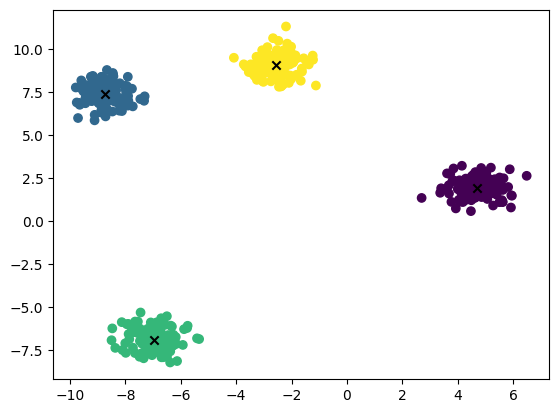

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs, make_moons, make_circles, load_iris, load_wine, load_breast_cancer, load_digits
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score, silhouette_samples
from scipy.cluster.hierarchy import dendrogram, linkage
from mpl_toolkits.mplot3d import Axes3D

RSEED = 42

X1, _ = make_blobs(n_samples=500, centers=4, cluster_std=0.6, random_state=RSEED)
km1 = KMeans(n_clusters=4, random_state=RSEED).fit(X1)
plt.scatter(X1[:,0], X1[:,1], c=km1.labels_)
plt.scatter(km1.cluster_centers_[:,0], km1.cluster_centers_[:,1], c='black', marker='x')
plt.show()

Question 22: Load the Iris dataset and use Agglomerative Clustering to group the data into 3 clusters. Display the first 10 predicted labels

In [32]:
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering

X_iris = load_iris().data
agg1 = AgglomerativeClustering(n_clusters=3).fit(X_iris)
print(agg1.labels_[:10])

[1 1 1 1 1 1 1 1 1 1]


Question 23: Generate synthetic data using make_moons and apply DBSCAN. Highlight outliers in the plot

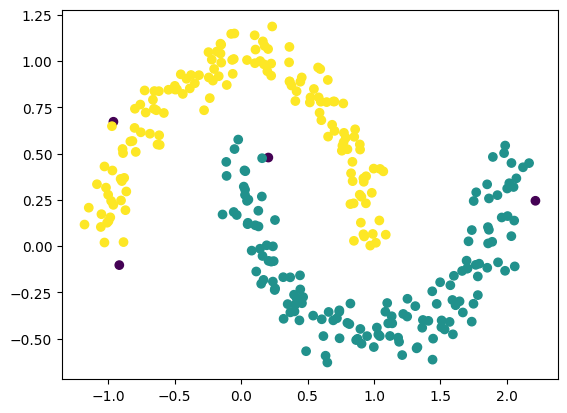

In [33]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN

RSEED = 42
X_moons, _ = make_moons(n_samples=300, noise=0.08, random_state=RSEED)
db_moons = DBSCAN(eps=0.15, min_samples=5).fit(X_moons)
plt.scatter(X_moons[:,0], X_moons[:,1], c=db_moons.labels_)
plt.show()

Question 24: Load the Wine dataset and apply K-Means clustering after standardizing the features. Print the size of each cluster

In [34]:
import numpy as np
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

RSEED = 42
X_wine = StandardScaler().fit_transform(load_wine().data)
km_wine = KMeans(n_clusters=3, random_state=RSEED).fit(X_wine)
unique, counts = np.unique(km_wine.labels_, return_counts=True)
for u, c in zip(unique, counts): print(f'Cluster {u}: {c}')

Cluster 0: 65
Cluster 1: 51
Cluster 2: 62


Question 25: Use make_circles to generate synthetic data and cluster it using DBSCAN. Plot the result

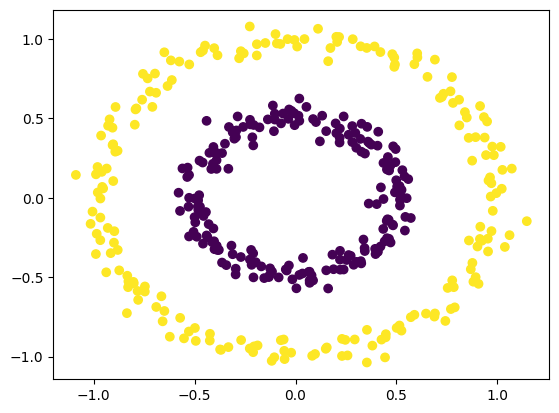

In [35]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.cluster import DBSCAN

RSEED = 42
X_circles, _ = make_circles(n_samples=400, noise=0.05, factor=0.5, random_state=RSEED)
db_circles = DBSCAN(eps=0.15, min_samples=5).fit(X_circles)
plt.scatter(X_circles[:,0], X_circles[:,1], c=db_circles.labels_)
plt.show()

Question 26: Load the Breast Cancer dataset, apply MinMaxScaler, and use K-Means with 2 clusters. Output the cluster centroids

In [36]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

RSEED = 42
X_bc = MinMaxScaler().fit_transform(load_breast_cancer().data)
km_bc = KMeans(n_clusters=2, random_state=RSEED).fit(X_bc)
print(km_bc.cluster_centers_)

[[0.50483563 0.39560329 0.50578661 0.36376576 0.46988732 0.42226302
  0.41838662 0.46928035 0.45899738 0.29945886 0.19093085 0.19112073
  0.17903433 0.13086432 0.18017962 0.25890126 0.12542475 0.30942779
  0.190072   0.13266975 0.48047448 0.45107371 0.4655302  0.31460597
  0.49868817 0.36391461 0.39027292 0.65827197 0.33752296 0.26041387]
 [0.25535358 0.28833455 0.24696416 0.14388369 0.35743076 0.18019471
  0.10344776 0.1306603  0.34011829 0.25591606 0.06427485 0.18843043
  0.05975663 0.02870108 0.18158628 0.13242941 0.05821528 0.18069336
  0.17221057 0.08403996 0.2052406  0.32069002 0.19242138 0.09943446
  0.3571115  0.14873935 0.13142287 0.26231363 0.22639412 0.15437354]]


Question 27: Generate synthetic data using make_blobs with varying cluster standard deviations and cluster with DBSCAN

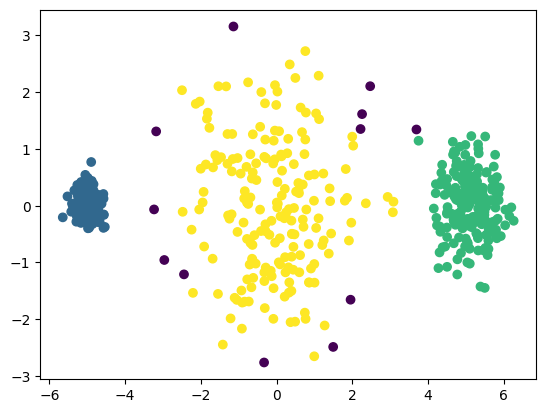

In [37]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import DBSCAN

RSEED = 42
X_var, _ = make_blobs(n_samples=600, centers=[(-5,0),(0,0),(5,0)], cluster_std=[0.2,1.2,0.5], random_state=RSEED)
db_var = DBSCAN(eps=0.8, min_samples=8).fit(X_var)
plt.scatter(X_var[:,0], X_var[:,1], c=db_var.labels_)
plt.show()

Question 28: Load the Digits dataset, reduce it to 2D using PCA, and visualize clusters from K-Means

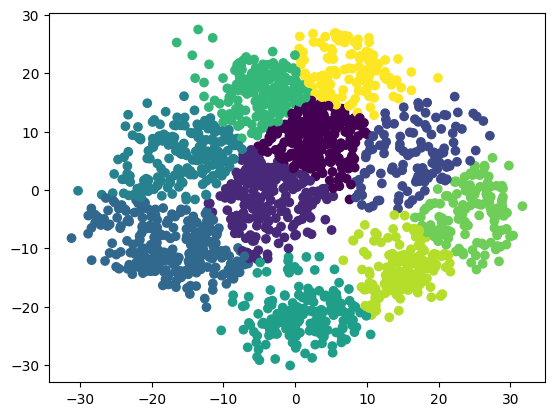

In [38]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

RSEED = 42
X_digits_pca = PCA(n_components=2, random_state=RSEED).fit_transform(load_digits().data)
km_digits = KMeans(n_clusters=10, random_state=RSEED).fit(X_digits_pca)
plt.scatter(X_digits_pca[:,0], X_digits_pca[:,1], c=km_digits.labels_)
plt.show()

Question 29: Create synthetic data using make_blobs and evaluate silhouette scores for k = 2 to 5. Display as a bar chart

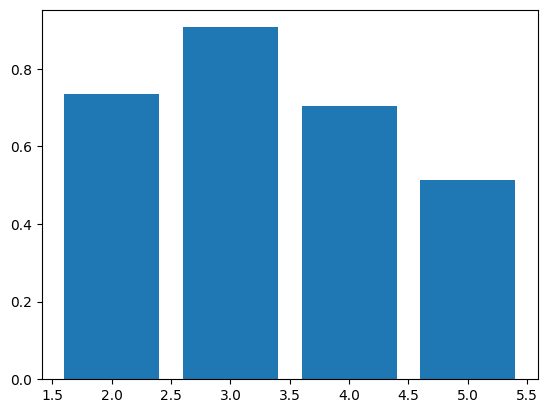

In [39]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

RSEED = 42
X_sil, _ = make_blobs(n_samples=400, centers=3, cluster_std=0.6, random_state=RSEED)
scores = {k: silhouette_score(X_sil, KMeans(n_clusters=k, random_state=RSEED).fit(X_sil).labels_) for k in range(2,6)}
plt.bar(scores.keys(), scores.values())
plt.show()

Question 30: Load the Iris dataset and use hierarchical clustering to group data. Plot a dendrogram with average linkage

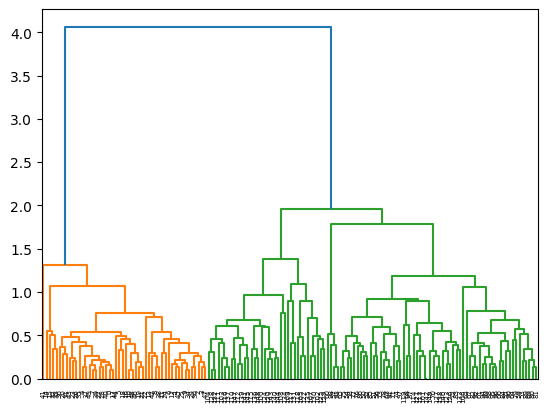

In [40]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from scipy.cluster.hierarchy import dendrogram, linkage

X_iris = load_iris().data
Z = linkage(X_iris, method='average')
dendrogram(Z)
plt.show()

Question 31: Generate synthetic data with overlapping clusters using make_blobs, then apply K-Means and visualize with decision boundaries

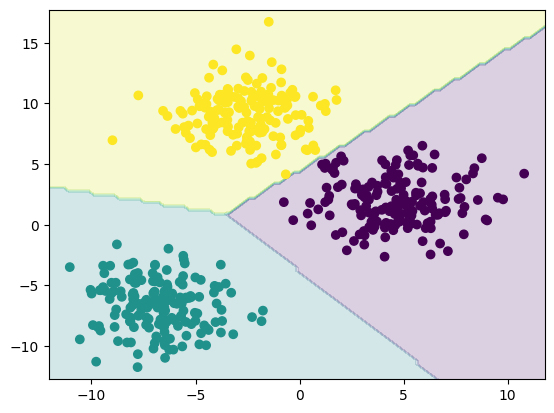

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

RSEED = 42
X_ov, _ = make_blobs(n_samples=500, centers=3, cluster_std=2.0, random_state=RSEED)
km_ov = KMeans(n_clusters=3, random_state=RSEED).fit(X_ov)
xx, yy = np.meshgrid(np.linspace(X_ov[:,0].min()-1, X_ov[:,0].max()+1, 100),
                     np.linspace(X_ov[:,1].min()-1, X_ov[:,1].max()+1, 100))
Z = km_ov.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.2)
plt.scatter(X_ov[:,0], X_ov[:,1], c=km_ov.labels_)
plt.show()

Question 32: Load the Digits dataset and apply DBSCAN after reducing dimensions with t-SNE. Visualize the results

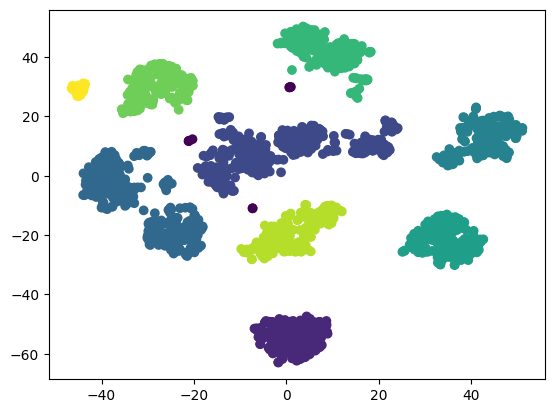

In [42]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN

RSEED = 42
X_tsne = TSNE(n_components=2, random_state=RSEED, init='pca', learning_rate='auto').fit_transform(load_digits().data)
db_digits = DBSCAN(eps=5, min_samples=5).fit(X_tsne)
plt.scatter(X_tsne[:,0], X_tsne[:,1], c=db_digits.labels_)
plt.show()

Question 33: Generate synthetic data using make_blobs and apply Agglomerative Clustering with complete linkage. Plot the result

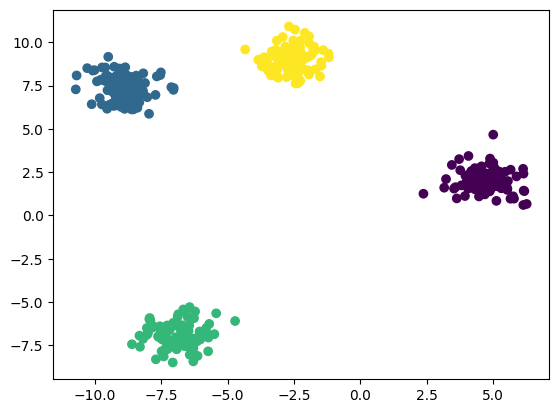

In [43]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering

RSEED = 42
X_aggl, _ = make_blobs(n_samples=400, centers=4, cluster_std=0.7, random_state=RSEED)
agg = AgglomerativeClustering(n_clusters=4, linkage='complete').fit(X_aggl)
plt.scatter(X_aggl[:,0], X_aggl[:,1], c=agg.labels_)
plt.show()

Question 34: Load the Breast Cancer dataset and compare inertia values for K = 2 to 6 using K-Means. Show results in a line plot

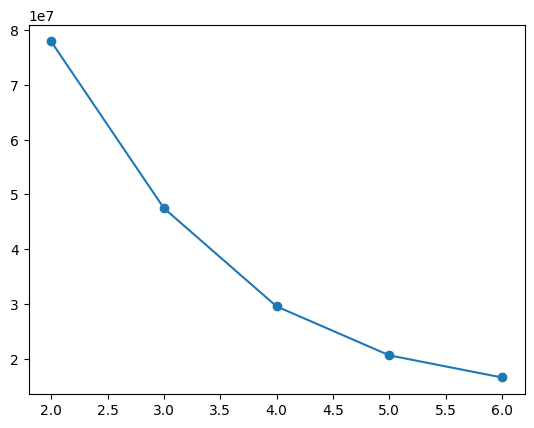

In [44]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.cluster import KMeans

RSEED = 42
X_bc = load_breast_cancer().data
inertias = [KMeans(n_clusters=k, random_state=RSEED).fit(X_bc).inertia_ for k in range(2,7)]
plt.plot(range(2,7), inertias, marker='o')
plt.show()

Question 35: Generate synthetic concentric circles using make_circles and cluster using Agglomerative Clustering with single linkage

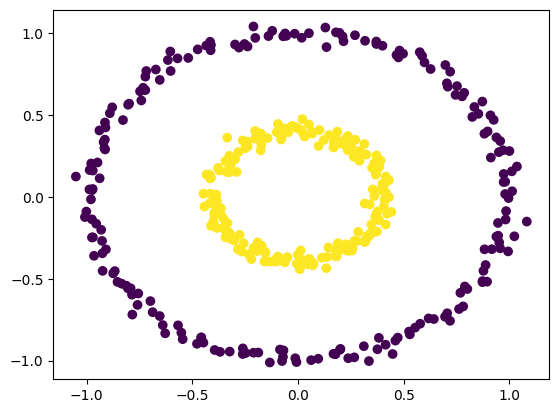

In [45]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.cluster import AgglomerativeClustering

RSEED = 42
X_cc, _ = make_circles(n_samples=400, factor=0.4, noise=0.03, random_state=RSEED)
agg_single = AgglomerativeClustering(n_clusters=2, linkage='single').fit(X_cc)
plt.scatter(X_cc[:,0], X_cc[:,1], c=agg_single.labels_)
plt.show()

Question 36: Use the Wine dataset, apply DBSCAN after scaling the data, and count the number of clusters (excluding noise)

In [46]:
import numpy as np
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

RSEED = 42
X_wine_scaled = StandardScaler().fit_transform(load_wine().data)
db_wine = DBSCAN(eps=1.5, min_samples=5).fit(X_wine_scaled)
labels = db_wine.labels_
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
print('Number of clusters (excluding noise):', n_clusters)

Number of clusters (excluding noise): 0


Question 37: Generate synthetic data using make_blobs and apply KMeans. Then plot the cluster centers on top of the data points

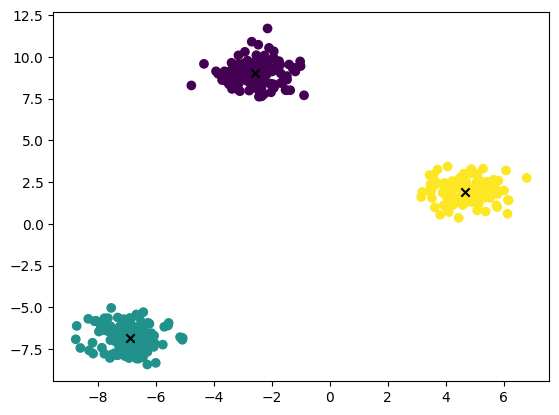

In [47]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

RSEED = 42
X_plot, _ = make_blobs(n_samples=400, centers=3, cluster_std=0.7, random_state=RSEED)
km_plot = KMeans(n_clusters=3, random_state=RSEED).fit(X_plot)
plt.scatter(X_plot[:,0], X_plot[:,1], c=km_plot.labels_)
plt.scatter(km_plot.cluster_centers_[:,0], km_plot.cluster_centers_[:,1], c='black', marker='x')
plt.show()

Question 38: Load the Iris dataset, cluster with DBSCAN, and print how many samples were identified as noise

In [48]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

RSEED = 42
X_iris_scaled = StandardScaler().fit_transform(load_iris().data)
db_iris = DBSCAN(eps=0.5, min_samples=5).fit(X_iris_scaled)
print('Number of noise samples:', np.sum(db_iris.labels_ == -1))

Number of noise samples: 34


Question 39: Generate synthetic non-linearly separable data using make_moons, apply K-Means, and visualize the clustering result

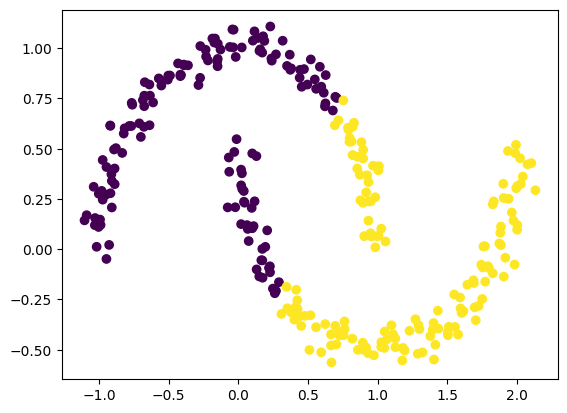

In [49]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.cluster import KMeans

RSEED = 42
X_moons2, _ = make_moons(n_samples=300, noise=0.05, random_state=RSEED)
km_moons = KMeans(n_clusters=2, random_state=RSEED).fit(X_moons2)
plt.scatter(X_moons2[:,0], X_moons2[:,1], c=km_moons.labels_)
plt.show()

Question 40: Load the Digits dataset, apply PCA to reduce to 3 components, then use KMeans and visualize with a 3D scatter plot

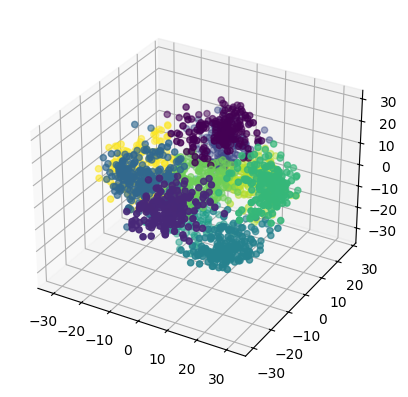

In [50]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D

RSEED = 42
X_digits_3d = PCA(n_components=3, random_state=RSEED).fit_transform(load_digits().data)
km_digits_3d = KMeans(n_clusters=10, random_state=RSEED).fit(X_digits_3d)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_digits_3d[:,0], X_digits_3d[:,1], X_digits_3d[:,2], c=km_digits_3d.labels_)
plt.show()

Question 41: Generate synthetic blobs with 5 centers and apply KMeans. Then use silhouette_score to evaluate the clustering

In [51]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

RSEED = 42
X_sil5, _ = make_blobs(n_samples=500, centers=5, cluster_std=0.6, random_state=RSEED)
km_sil5 = KMeans(n_clusters=5, random_state=RSEED).fit(X_sil5)
print('Silhouette Score:', silhouette_score(X_sil5, km_sil5.labels_))

Silhouette Score: 0.7993257411585863


Question 42: Load the Breast Cancer dataset, reduce dimensionality using PCA, and apply Agglomerative Clustering. Visualize in 2D

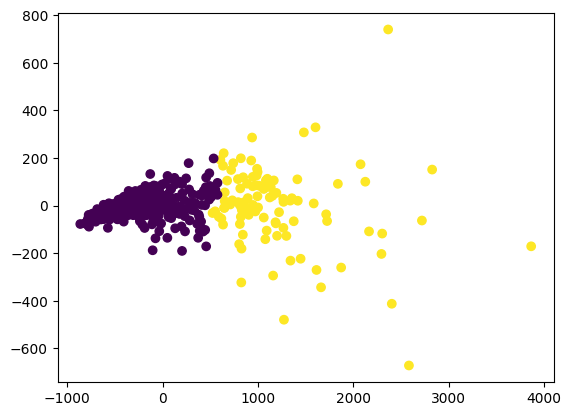

In [52]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering

RSEED = 42
X_bc_pca = PCA(n_components=2, random_state=RSEED).fit_transform(load_breast_cancer().data)
agg_bc = AgglomerativeClustering(n_clusters=2).fit(X_bc_pca)
plt.scatter(X_bc_pca[:,0], X_bc_pca[:,1], c=agg_bc.labels_)
plt.show()

Question 43: Generate noisy circular data using make_circles and visualize clustering results from KMeans and DBSCAN side-by-side

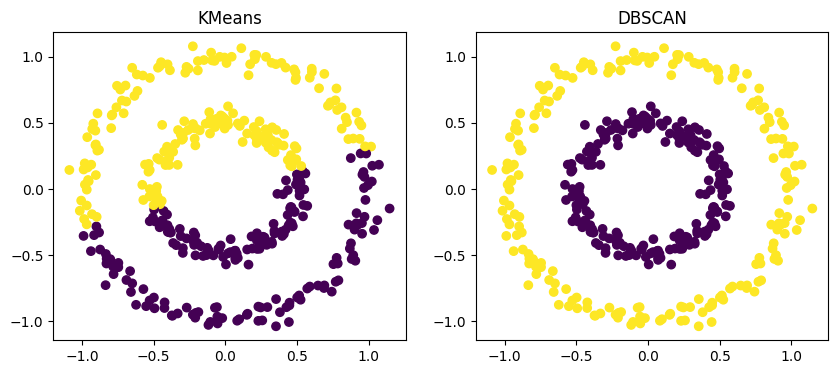

In [53]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.cluster import KMeans, DBSCAN

RSEED = 42
X_circle_noise, _ = make_circles(n_samples=400, factor=0.5, noise=0.05, random_state=RSEED)
km_circle = KMeans(n_clusters=2, random_state=RSEED).fit(X_circle_noise)
db_circle = DBSCAN(eps=0.15, min_samples=5).fit(X_circle_noise)
fig, axes = plt.subplots(1,2, figsize=(10,4))
axes[0].scatter(X_circle_noise[:,0], X_circle_noise[:,1], c=km_circle.labels_)
axes[0].set_title('KMeans')
axes[1].scatter(X_circle_noise[:,0], X_circle_noise[:,1], c=db_circle.labels_)
axes[1].set_title('DBSCAN')
plt.show()

Question 44: Load the Iris dataset and plot the Silhouette Coefficient for each sample after KMeans clustering

In [54]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

RSEED = 42
X_iris = load_iris().data
km_iris = KMeans(n_clusters=3, random_state=RSEED).fit(X_iris)
sil_values = silhouette_score(X_iris, km_iris.labels_)
print('Average Silhouette Score:', sil_values)

Average Silhouette Score: 0.551191604619592


Question 45: Generate synthetic data using make_blobs and apply Agglomerative Clustering with 'average' linkage. Visualize clusters

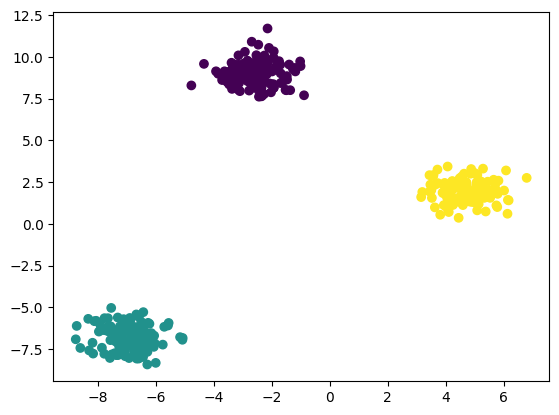

In [55]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering

RSEED = 42
X_aggl_avg, _ = make_blobs(n_samples=400, centers=3, cluster_std=0.7, random_state=RSEED)
agg_avg = AgglomerativeClustering(n_clusters=3, linkage='average').fit(X_aggl_avg)
plt.scatter(X_aggl_avg[:,0], X_aggl_avg[:,1], c=agg_avg.labels_)
plt.show()

Question 46: Load the Wine dataset, apply KMeans, and visualize the cluster assignments in a seaborn pairplot (first 4 features)

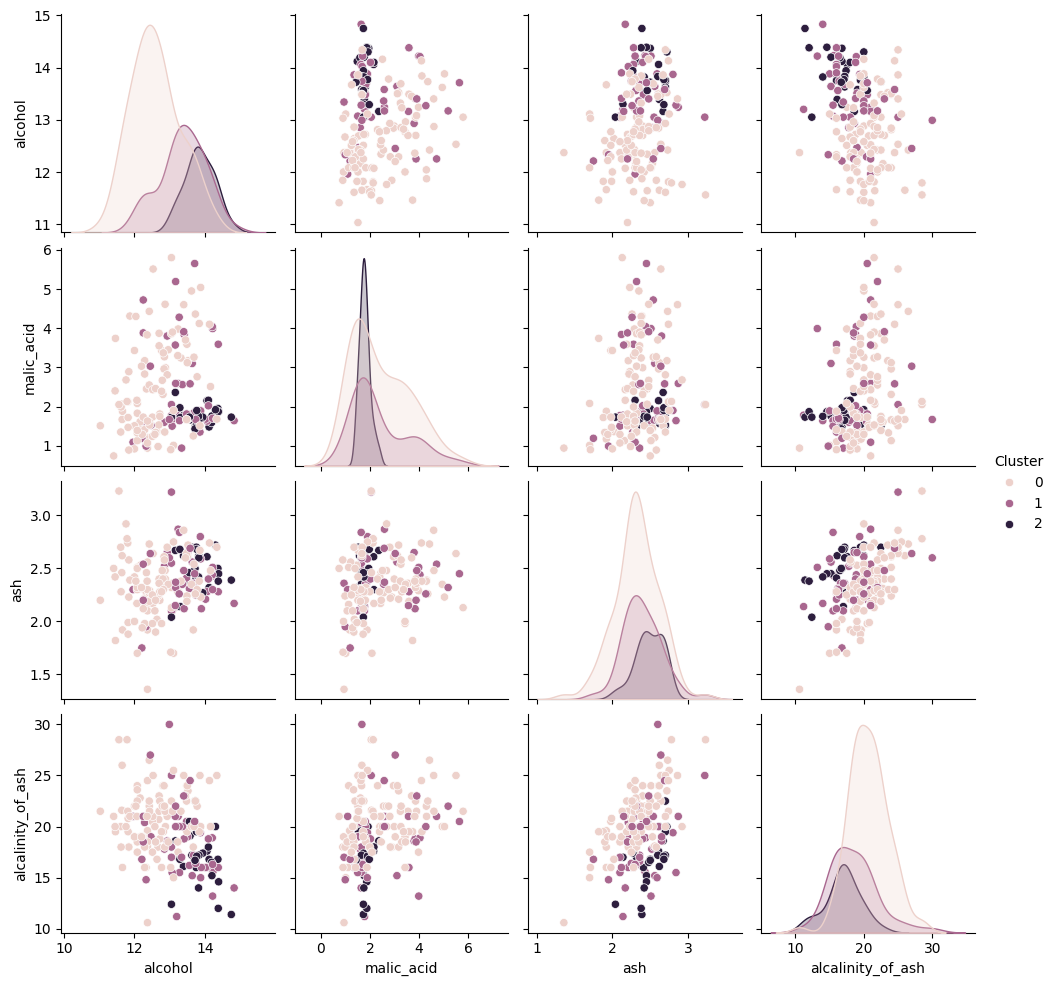

In [56]:
import pandas as pd
import seaborn as sns
from sklearn.datasets import load_wine
from sklearn.cluster import KMeans

RSEED = 42
wine_data = pd.DataFrame(load_wine().data, columns=load_wine().feature_names)
km_wine2 = KMeans(n_clusters=3, random_state=RSEED).fit(wine_data)
wine_data['Cluster'] = km_wine2.labels_
sns.pairplot(wine_data, vars=wine_data.columns[:4], hue='Cluster')
plt.show()

Question 47: Generate noisy blobs using make_blobs and use DBSCAN to identify both clusters and noise points. Print the count

In [57]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import DBSCAN

RSEED = 42
X_noisy, _ = make_blobs(n_samples=500, centers=3, cluster_std=1.0, random_state=RSEED)
db_noisy = DBSCAN(eps=1.2, min_samples=5).fit(X_noisy)
print('Number of noise points:', np.sum(db_noisy.labels_ == -1))

Number of noise points: 2


Question 48: Load the Digits dataset, reduce dimensions using t-SNE, then apply Agglomerative Clustering and plot the clusters

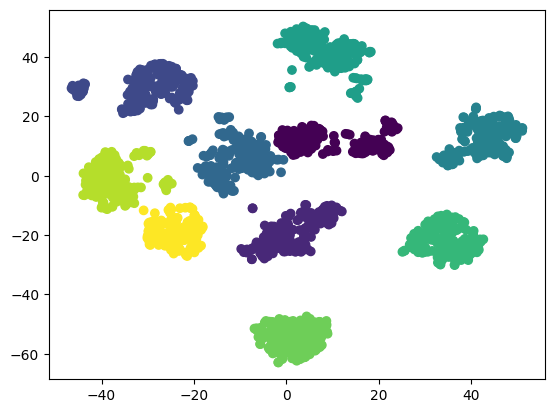

In [58]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.manifold import TSNE
from sklearn.cluster import AgglomerativeClustering

RSEED = 42
X_digits_tsne = TSNE(n_components=2, random_state=RSEED, init='pca', learning_rate='auto').fit_transform(load_digits().data)
agg_digits = AgglomerativeClustering(n_clusters=10).fit(X_digits_tsne)
plt.scatter(X_digits_tsne[:,0], X_digits_tsne[:,1], c=agg_digits.labels_)
plt.show()